# Basic usage of oatomobile

In [ ]:
%load_ext autoreload
%autoreload 2

## Use as gym environment

In [ ]:
import oatomobile
from oatomobile.envs import CARLAEnv
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Rule-based agents.
import oatomobile.baselines.rulebased

agent = oatomobile.baselines.rulebased.AutopilotAgent(environment)

In [2]:
environment = CARLAEnv(town="Town01")

In [3]:
observation = environment.reset()

/apps/conda/wyao1/envs/coiltraine/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [15]:
action['brake'] = 0
action['steer'] = 0
action['throttle'] = 1

In [35]:
observation.keys()

dict_keys(['velocity', 'predictions', 'location', 'lane_invasion', 'bird_view_camera_rgb', 'rotation', 'bird_view_camera_cityscapes', 'traffic_light_state', 'goal', 'control', 'is_at_traffic_light', 'collision', 'lidar', 'front_camera_rgb'])

In [38]:
action = agent.act(observation)
observation, reward, done, info = environment.step(action)

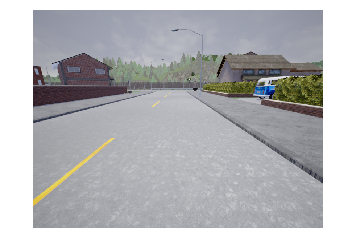

In [39]:
plt.imshow(observation['front_camera_rgb'])
plt.axis('off');

In [42]:
observation['lidar'].shape

(200, 200, 2)

In [40]:
observation.keys()

dict_keys(['is_at_traffic_light', 'control', 'velocity', 'traffic_light_state', 'predictions', 'lane_invasion', 'lidar', 'location', 'front_camera_rgb', 'rotation', 'goal', 'bird_view_camera_cityscapes', 'bird_view_camera_rgb', 'collision'])

In [41]:
environment.simulator._time_elapsed

array(3., dtype=float32)

In [71]:
observation['velocity']

array([ 3.2924235e-04, -9.2226110e-05,  1.8112977e-04], dtype=float32)

In [78]:
action

OrderedDict([('brake', array(0.23014401, dtype=float32)),
             ('steer', array(-0.21500309, dtype=float32)),
             ('throttle', array(0.7726281, dtype=float32))])

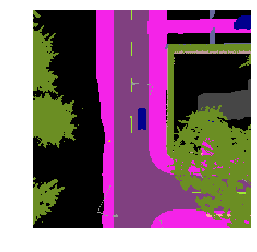

In [41]:
plt.imshow(observation['bird_view_camera_cityscapes'])
plt.axis('off');

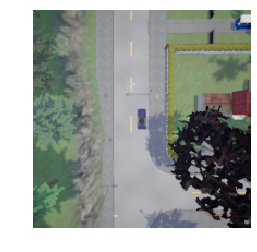

In [36]:
plt.imshow(observation['bird_view_camera_rgb'])
plt.axis('off');

(0, 16)

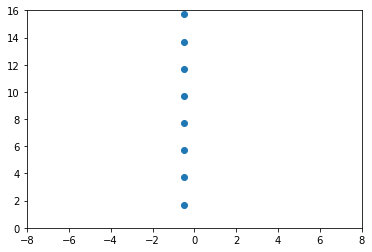

In [38]:
plt.scatter(observation['goal'][:,1], observation['goal'][:,0])
plt.xlim([-8,8])
plt.ylim([0,16])

In [23]:
observation['control']

array([0., 0., 0.], dtype=float32)

array([3.3435773e+02, 7.4326477e+01, 1.8328248e-02], dtype=float32)

In [32]:
observation['goal']

array([[-2.9582262e-01, -4.9767146e-01, -9.3323383e-03],
       [ 1.7041408e+00, -4.9651098e-01, -2.1441266e-02],
       [ 3.7041042e+00, -4.9538100e-01, -3.3549748e-02],
       [ 5.7040677e+00, -4.9422053e-01, -4.5658678e-02],
       [ 7.7040310e+00, -4.9309057e-01, -5.7767160e-02],
       [ 9.7039938e+00, -4.9193010e-01, -6.9876090e-02],
       [ 1.1703958e+01, -4.9080014e-01, -8.1984572e-02],
       [ 1.3703921e+01, -4.8963967e-01, -9.4093502e-02],
       [ 1.5703884e+01, -4.8847920e-01, -1.0620242e-01],
       [ 1.7703848e+01, -4.8734924e-01, -1.1831091e-01]], dtype=float32)

In [33]:
observation['location']

array([3.3435773e+02, 7.4326477e+01, 1.8328248e-02], dtype=float32)

In [25]:
observation['goal'][:,:2]

array([[-0.29582262, -0.49767146],
       [ 1.7041408 , -0.49651098],
       [ 3.7041042 , -0.495381  ],
       [ 5.7040677 , -0.49422053],
       [ 7.704031  , -0.49309057],
       [ 9.703994  , -0.4919301 ],
       [11.703958  , -0.49080014],
       [13.703921  , -0.48963967],
       [15.703884  , -0.4884792 ],
       [17.703848  , -0.48734924]], dtype=float32)

In [42]:
environment.close()